(2000, 512)


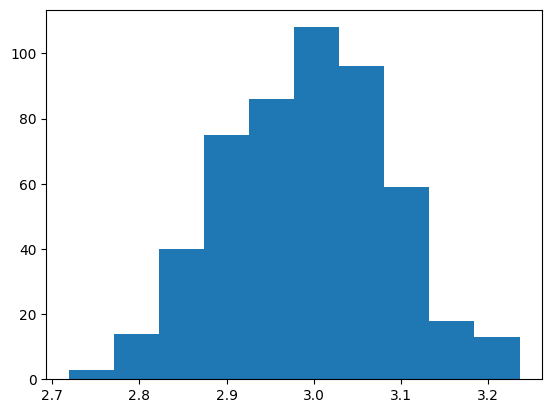

True
2000


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# 512维，data包含2000个向量，每个向量符合正态分布
d = 512          
n_data = 2000   
np.random.seed(0) 
data = []
mu = 3
sigma = 0.1
for i in range(n_data):
    data.append(np.random.normal(mu, sigma, d))
data = np.array(data).astype('float32')
# print(data[0])
print(data.shape)
# 查看第6个向量是不是符合正态分布
import matplotlib.pyplot as plt 
plt.hist(data[5])
plt.show()

# 精确索引
query = []
n_query = 10
mu = 3
sigma = 0.1
np.random.seed(12) 
query = []
for i in range(n_query):
    query.append(np.random.normal(mu, sigma, d))
query = np.array(query).astype('float32')

import faiss
index = faiss.IndexFlatL2(d)  # 构建 IndexFlatL2
print(index.is_trained)  # False时需要train
index.add(data)  #添加数据
print(index.ntotal)  #index中向量的个数

In [5]:
#精确索引无需训练便可直接查询
k = 10  # 返回结果个数
query_self = data[4:5]  # 查询本身
dis, ind = index.search(query_self, k)
print(dis.shape) # 打印张量 (5, 10)
print(ind.shape) # 打印张量 (5, 10)
print(dis)  # 升序返回每个查询向量的距离
print(ind)  # 升序返回每个查询向量


(1, 10)
(1, 10)
[[0.       8.346272 8.407202 8.462828 8.497231 8.5208   8.597084 8.600385
  8.605134 8.630593]]
[[   4   13  715 1470  608  459  888  850 1080 1654]]


In [6]:
query_self

array([[2.8303869, 3.0730183, 2.8142517, 3.0382597, 2.9113095, 3.0878303,
        3.0086453, 3.0247707, 2.8981721, 2.934543 , 3.0207217, 3.058357 ,
        3.2929096, 3.022286 , 3.0976038, 2.8443067, 2.8670108, 2.9644506,
        2.8802571, 3.14864  , 2.9589782, 3.1382182, 3.1486783, 3.004278 ,
        3.05018  , 2.99439  , 3.0538437, 3.0483341, 2.9876351, 3.050497 ,
        3.1723697, 3.0713017, 3.03258  , 3.012477 , 2.8987327, 2.8972702,
        3.0323358, 2.863061 , 2.9233673, 3.1281512, 3.191423 , 2.8334043,
        3.162665 , 2.978856 , 2.9984994, 2.988659 , 3.1080544, 2.8392324,
        3.0456164, 2.905513 , 3.0570788, 3.1542797, 2.9999583, 3.0374155,
        3.040955 , 2.9200406, 3.1511638, 3.170647 , 3.0701783, 3.0073285,
        2.9538107, 2.937351 , 3.1710837, 3.1414416, 2.9936337, 2.842007 ,
        2.7167988, 2.8916574, 2.986938 , 3.140069 , 2.9348345, 3.0504816,
        3.1303182, 3.0128536, 2.9857552, 2.8691237, 2.8797524, 3.04161  ,
        2.9799092, 3.012253 , 2.995272

In [3]:
query_self

array([[3.1764052, 3.0400157, 3.0978737, ..., 3.1301427, 3.089526 ,
        3.1374965],
       [2.8667789, 2.8031375, 2.9339943, ..., 3.0701041, 2.9582522,
        2.8902504],
       [3.1712306, 2.9207885, 2.8954475, ..., 3.028377 , 2.9717803,
        2.8841796],
       [2.838064 , 2.948896 , 3.174063 , ..., 3.010016 , 2.9524825,
        3.1272955],
       [2.8303869, 3.0730183, 2.8142517, ..., 2.9410303, 2.9727466,
        3.0737522]], dtype=float32)

In [7]:
# 倒排表快速索引
nlist = 50  # 将数据库向量分割为多少了维诺空间
k = 10
quantizer = faiss.IndexFlatL2(d)  # 量化器
# METRIC_L2计算L2距离, 或faiss.METRIC_INNER_PRODUCT计算内积
index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
print(index.is_trained)
#倒排表索引类型需要训练, 训练数据集应该与数据库数据集同分布
index.train(data)
print(index.is_trained)

index.add(data)
index.nprobe = 50  # 选择n个维诺空间进行索引,
#dis, ind = index.search(query, k)
dis, ind = index.search(query_self, k)
print(dis)
print(ind)


False
True
[[0.       8.346272 8.407202 8.462828 8.497231 8.5208   8.597084 8.600385
  8.605134 8.630593]]
[[   4   13  715 1470  608  459  888  850 1080 1654]]


In [3]:
# 乘积量化索引
nlist = 50
m = 8  # 列方向划分个数，必须能被d整除
k = 10
quantizer = faiss.IndexFlatL2(d)  
# 8 表示每个子向量被编码为 8 bits
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, 8) 
index.train(data)
index.add(data)
index.nprobe = 50
dis, ind = index.search(query_self, k)  # 查询自身
print(dis)
print(ind)
"""
dis, ind = index.search(query, k)  # 真实查询
print(dis)
print(ind)
"""

[[4.6277246  5.1453824  5.1764784  5.1985474  5.200544   5.201029
  5.2306223  5.2327447  5.2368197  5.237051  ]
 [4.2167706  4.647105   4.8003736  4.8635883  4.871478   4.9131913
  4.9194264  4.9296308  4.940721   4.945765  ]
 [4.0325227  4.7176094  4.7511168  4.795289   4.833613   4.8647084
  4.8749743  4.8807297  4.881535   4.897663  ]
 [4.1453667  4.8391676  4.8694105  4.888366   4.92729    4.929869
  4.9352455  4.936894   4.9594526  4.9716854 ]
 [0.18832636 4.7323246  4.820816   4.906128   4.913453   4.9232316
  4.92673    4.9344196  4.938006   4.9416313 ]]
[[   0  492 1701  467  797 1933  820  125 1302  819]
 [   1 1911 1518  911 1507   92 1230 1920 1940 1599]
 [   2 1594 1949  928 1464 1144 1336  259 1143  225]
 [   3 1310 1918  254 1015  567  731  926  302 1210]
 [   4 1263   32 1678  501  748 1063  513 1654 1844]]


'\ndis, ind = index.search(query, k)  # 真实查询\nprint(dis)\nprint(ind)\n'